In [ ]:
# Import the pandas library
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("Ready to start! ✓")

# Welcome to Data Analysis with Pandas! 📊

## What You'll Learn Today
By the end of this notebook, you'll be able to:
- Work with tables of data (like Excel, but in Python)
- Clean messy data
- Ask questions about your data
- Create simple charts to visualize patterns

## Why Pandas?
Think of Pandas as **Excel for Python**. But instead of clicking buttons, you write simple commands. This makes your work:
- **Repeatable** - Run the same analysis on new data instantly
- **Shareable** - Anyone can see exactly what you did
- **Powerful** - Handle millions of rows (Excel crashes at ~1 million!)

## Real-World Example
Imagine you're analyzing customer data for a coffee shop:
- Who are your most frequent customers?
- What time of day is busiest?
- Which products sell together?

Pandas helps you answer these questions quickly!

# Part 1: Pandas Foundations

**pandas** is the most popular library for Data Analysis in Python. It is like **Excel for Python** but much more powerful.
- **NumPy** gave us vectors (arrays of numbers).
- **pandas** gives us **Tables** (DataFrames) with labels.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Series - Your First Data Structure

Before diving into tables, **pandas** provides a single column of data called a **Series**.

Think of a Series as a **single column from Excel** with row labels.

**Series** are essentially: **Vector** + **Index**.
- **Vector**: The actual data (numbers, strings).
- **Index**: The label for each data point.

### Real-life Example: A Shopping List with Prices

Without labels (just positions 0, 1, 2):
```
0    $10
1    $20
2    $30
```

With labels (meaningful names):
```
Coffee      $10
Sandwich    $20
Cake        $30
```

**This is what makes Pandas powerful - labels make data readable!**

In [ ]:
# Create a simple Series from a list
prices = [10, 20, 30]
s = pd.Series(prices)

print("Without labels:")
print(s)
print("\n" + "="*40 + "\n")

# Same data with meaningful labels
s = pd.Series(prices, index=['Coffee', 'Sandwich', 'Cake'])
print("With labels (much better!):")
print(s)
print("\n" + "="*40 + "\n")

# Access by label (like a dictionary)
print(f"The coffee costs: ${s['Coffee']}")
print(f"The cake costs: ${s['Cake']}")

0    30
1    20
2    10
dtype: int64
Simple Series
0    10
1    20
2    30
dtype: int64
Simple
[10, 20, 30]

Series with lables
A    10
B    20
C    30
dtype: int64


## The DataFrame - The Full Table

A DataFrame is a 2-dimensional table (Rows and Columns). Think of it as a **complete Excel spreadsheet**.

Mathematically, a DataFrame is just a **Collection of Series that share the same Index**.

### Why Use a Dictionary to Create DataFrames?

A dictionary is the easiest way to create a DataFrame because:
- **Keys** → Column Names
- **Values** (lists) → The data in each column
- All lists must be the same length (same number of rows)

### Visual Representation:

```
Dictionary:                         DataFrame:
{                                   Name     Age   City
  "Name": ["Alice", "Bob"]          Alice    24    New York
  "Age": [24, 27]              →    Bob      27    San Francisco
  "City": ["NYC", "SF"]
}
```

### Real-World Analogy:
- **Rows** = Individual records (like a person, or a sale)
- **Columns** = Characteristics (like name, age, city)
- Each column can have a different type (numbers, text, dates)

In [ ]:
# Think of each key-value pair as a column
data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],              # Column 1: Text
    "Age": [24, 27, 22, 32],                                  # Column 2: Numbers
    "City": ["New York", "San Francisco", "Los Angeles", "Chicago"],  # Column 3: Text
    "Score": [85.5, 90.0, 78.0, 88.5]                        # Column 4: Decimal numbers
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

print("Our complete table:")
print(df)
print("\n" + "="*40 + "\n")

# Access one column (returns a Series)
cities = df['City']
print("Just the cities column:")
print(cities)
print(f"\nType: {type(cities)}")  # This is a Series!

,Name,Age,City,Score
0,Alice,24,New York,85.5
1,Bob,27,San Francisco,90.0
2,Charlie,22,Los Angeles,78.0
3,David,32,Chicago,88.5


In [ ]:
# You can also use dot notation (when column name has no spaces)
ages = df.Age
print("Ages using dot notation:")
print(ages)
print("\n" + "="*40 + "\n")

# Select multiple columns (returns a DataFrame)
subset = df[['Name', 'City']]
print("Multiple columns:")
print(subset)
print(f"\nType: {type(subset)}")  # This is a DataFrame!

<class 'pandas.core.series.Series'>


,City
0,New York
1,San Francisco
2,Los Angeles
3,Chicago


## Exploring Your Data - Essential Methods

When you first get data, you need to answer basic questions:
- How much data do I have?
- What does it look like?
- Are there any problems?

Here are the **5 essential commands** every data analyst uses:

### 1. `.head()` - Peek at the Top

**What it does:** Shows you the first few rows (default 5)

**When to use it:** 
- First thing you do with new data
- Make sure it loaded correctly
- Get a feel for what columns exist

**Think of it as:** Opening a book to see the first page

In [ ]:
# Look at first 2 rows (instead of default 5)
df.head(2)

,Name,Age,City,Score
0,Alice,24,New York,85.5
1,Bob,27,San Francisco,90.0


### 2. `.tail()` - Peek at the Bottom

**What it does:** Shows you the last few rows (default 5)

**When to use it:**
- Check if data loaded completely
- See the most recent entries (if data is time-sorted)

**Useful for:** Making sure your file didn't cut off halfway!

In [ ]:
# Look at last 3 rows
df.tail(3)

NameError: name 'df' is not defined

### 3. `.info()` - Get the Summary

**What it does:** Tells you about each column:
- How many rows total?
- What type is each column? (numbers, text, dates)
- Are there missing values?

**When to use it:**
- Check data types are correct (sometimes numbers load as text!)
- Find missing data before it causes errors

**Real example:** Imagine you loaded customer ages, but they're text ("24") instead of numbers (24). `.info()` catches this!

In [ ]:
# Get general information about the DataFrame
df.info()

# What to look for:
# - Total rows: 4 entries
# - Data types: Age is int64 (good! it's a number), City is object (text is OK for cities)
# - Non-null count: All 4 values present (no missing data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   Age     4 non-null      int64  
 2   City    4 non-null      object 
 3   Score   4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes


### 4. `.describe()` - Get Statistics

**What it does:** Calculates summary statistics for numerical columns:
- **count**: How many values
- **mean**: Average value
- **std**: Standard deviation (spread of data)
- **min/max**: Smallest and largest values
- **25%, 50%, 75%**: Quartiles (dividing data into quarters)

**When to use it:**
- Get a quick sense of your numbers
- Spot outliers (values way different from others)
- Understand the range of your data

In [ ]:
# Get summary statistics for numerical columns
df.describe()

# Notice: Only Age and Score are shown (they're numbers)
# Name and City are text, so no statistics for them

,Age,Score
count,4.000000,4.000000
mean,26.250000,85.500000
std,4.349329,5.338539
min,22.000000,78.000000
25%,23.500000,83.625000
50%,25.500000,87.000000
75%,28.250000,88.875000
max,32.000000,90.000000


### 5. Other Useful Quick Checks

**`.shape`** - How big is my table? (rows, columns)

**`.dtypes`** - What type is each column? (Note: this is an attribute, not a function)

**`.columns.tolist()`** - Get a list of all column names

In [ ]:
# Check data types (Note: no parentheses - it's an attribute)
print("Data types of each column:")
print(df.dtypes)
print("\n" + "="*40 + "\n")

# Check shape (rows, columns)
print(f"Shape: {df.shape}")
print(f"This means: {df.shape[0]} rows and {df.shape[1]} columns")
print("\n" + "="*40 + "\n")

# Get list of column names
print("Column names:")
print(df.columns.tolist())

,0
Name,object
Age,int64
City,object
Score,float64


### Loading Real Data (read_csv)
Creating DataFrames by hand is good for practice, but in real AI projects, we load data from files (CSV, Excel, SQL).

Before analyzing, we need to understand what each column represents.

| Variable | Definition | Key / Notes |
| :--- | :--- | :--- |
| **survival** | Survival | `0` = No, `1` = Yes |
| **pclass** | Ticket class | `1` = 1st, `2` = 2nd, `3` = 3rd |
| **sex** | Sex | |
| **Age** | Age in years | |
| **sibsp** | # of siblings / spouses aboard the Titanic | |
| **parch** | # of parents / children aboard the Titanic | |
| **ticket** | Ticket number | |
| **fare** | Passenger fare | |
| **cabin** | Cabin number | |
| **embarked** | Port of Embarkation | `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton |

In [ ]:
# URL to the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

titanic = pd.read_csv(url)

print("Data loaded successfully!")
titanic

Data loaded successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Selection & Indexing
Now that we have data, how do we grab specific parts of it? There are two ways to slice data: Columns (Vertical) and Rows (Horizontal).

**Selecting Columns**
- Single Brackets `df['col']`: Returns a Series (1D).

- Double Brackets `df[['col1', 'col2']]`: Returns a DataFrame (2D).

In [ ]:
# Select a single column
ages = titanic['Age']
print(type(ages)) # Series
print(ages.head())

# Select multiple columns
subset = titanic[['Name', 'Age', 'Fare']]
print(type(subset)) # DataFrame
subset.head()

<class 'pandas.core.series.Series'>
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>


,Name,Age,Fare
0,"Braund, Mr. Owen Harris",22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833
2,"Heikkinen, Miss. Laina",26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
4,"Allen, Mr. William Henry",35.0,8.0500


**Selecting Rows**
- `.iloc` (Integer Location): Select by Position(0,1,2) like python lists.
- `.loc` (Lable Location): Select by Index Name.

In [ ]:
# Create a copy with 'Name' as an index
df_named = titanic.set_index('Name')
df_named.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Select using .iloc
df_named.iloc[0:10] # slicing like lists, return the first five rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
df_named.iloc[5:10, 0:5]

,PassengerId,Survived,Pclass,Sex,Age
Name,,,,,
"Moran, Mr. James",6,0,3,male,NaN
"McCarthy, Mr. Timothy J",7,0,1,male,54.0
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0
"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0


In [ ]:
# Select using .loc (by label)
df_named.loc["Braund, Mr. Owen Harris" : "Palsson, Master. Gosta Leonard", "Survived" : "Fare"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
Name,,,,,,,,
"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,A/5 21171,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599,71.2833
"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,113803,53.1000
"Allen, Mr. William Henry",0,3,male,35.0,0,0,373450,8.0500
"Moran, Mr. James",0,3,male,NaN,0,0,330877,8.4583
"McCarthy, Mr. Timothy J",0,1,male,54.0,0,0,17463,51.8625
"Palsson, Master. Gosta Leonard",0,3,male,2.0,3,1,349909,21.0750


## Filtering - Finding Specific Rows

This is the **most powerful skill** in data analysis. Instead of manually scrolling through thousands of rows, you ask Python to find exactly what you want.

### The Magic of Boolean Masks

**Think of it like a yes/no checklist:**

Question: "Is Age > 60?"
- Row 1 (Age 24)? → NO
- Row 2 (Age 27)? → NO  
- Row 3 (Age 22)? → NO
- Row 4 (Age 61)? → YES ✓

Only the "YES" rows are kept.

### The Two-Step Process:
1. **Create the mask** (True/False for each row)
2. **Apply it** to filter the DataFrame

**Syntax:** `df[condition]`

In [ ]:
# Step 1: Create the mask (True/False for each row)
mask = titanic['Age'] > 60

print("First 10 True/False values:")
print(mask.head(10))
print("\n" + "="*50 + "\n")

# Step 2: Filter (keep only True rows)
elderly = titanic[mask]

print(f"Found {len(elderly)} elderly passengers (age > 60)")
print("\nFirst few elderly passengers:")
print(elderly[['Name', 'Age', 'Sex']].head())

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


### Shortcut: One-Line Filtering

Usually, we combine both steps into one line (more efficient):

In [ ]:
# One-line filtering (most common way)
elderly = titanic[titanic['Age'] > 60]

print(f"Found {len(elderly)} elderly passengers")
elderly[['Name', 'Age', 'Sex']].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


### Combining Conditions

What if we want passengers who are:
- Male **AND**
- First Class **AND**  
- Paid over $100

**Think of it as multiple filters:**
- Filter 1: Is male? → YES/NO
- Filter 2: Is 1st class? → YES/NO
- Filter 3: Paid > $100? → YES/NO

**Only keep rows where ALL are YES.**

### Operators:
- **AND:** Use `&` (both conditions must be True)
- **OR:** Use `|` (at least one condition must be True)

**⚠️ Important:** Wrap each condition in parentheses `()`

In [ ]:
# Multiple conditions with AND (&)
# Find: Male passengers in 2nd class who paid over $100

condition1 = (titanic['Sex'] == 'male')
condition2 = (titanic['Pclass'] == 2)
condition3 = (titanic['Fare'] > 100)

# Combine all conditions
rich_men = titanic[condition1 & condition2 & condition3]

print(f"Found {len(rich_men)} passengers matching all criteria")
print("\nTheir details:")
rich_men[['Name', 'Sex', 'Pclass', 'Fare']].head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Using OR (|) - at least one condition must be True
extreme_ages = titanic[(titanic['Age'] < 5) | (titanic['Age'] > 70)]

print(f"Found {len(extreme_ages)} passengers with extreme ages")
print("\nTheir details:")
extreme_ages[['Name', 'Age', 'Sex']].head(10)

### Example with OR

Find passengers who are **either** very young (Age < 5) **or** very old (Age > 70):

## Data Cleaning - Fixing Messy Data

**Reality check:** Real data is NEVER perfect. You'll always find:
- ❌ Missing values (empty cells)
- ❌ Duplicates (same person entered twice)
- ❌ Wrong types (numbers stored as text)
- ❌ Typos and inconsistencies

**Think of data cleaning as:** Preparing ingredients before cooking. You can't make a good meal with rotten vegetables!

### Why Data Cleaning Matters:
- Most AI models crash if you feed them missing values
- Statistics get messed up (what's the average of [10, 20, ???])
- You might miss important patterns

### Understanding Missing Data (`NaN`)

`NaN` means "Not a Number" - it's Python's way of saying "this cell is empty."

**Visualizing missing data:**

Imagine your table like this:

| Name    | Age | Cabin |
|---------|-----|-------|
| Alice   | 24  | A12   |
| Bob     | ??  | ??    | ← Missing!
| Charlie | 30  | ??    | ← Missing!

Before doing anything, we need to **find** where the missing data is:

In [ ]:
# Check for missing values
# isnull() returns True/False for each cell
# .sum() counts the "True" values (missing data)

missing = titanic.isnull().sum()
print("Missing values in each column:")
print(missing)
print("\n" + "="*50 + "\n")

# Calculate percentage missing
print("Percentage missing:")
percent_missing = (missing / len(titanic)) * 100
print(percent_missing.round(1))
print("\n" + "="*50 + "\n")

# Key insights:
print("Key findings:")
print(f"- Cabin is {percent_missing['Cabin']:.1f}% missing (mostly empty!)")
print(f"- Age is {percent_missing['Age']:.1f}% missing")
print(f"- Embarked is {percent_missing['Embarked']:.1f}% missing (just 2 people)")

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### How to Handle Missing Data - Simple Decision Tree

**Decision flowchart:**

```
Is the column mostly empty (>50% missing)?
├─ YES → Drop the entire column
└─ NO → Is it just a few rows missing?
    ├─ Few rows (<5%) → Drop those rows
    └─ Many rows → Fill with a sensible value
        ├─ Numbers → Use median (middle value)
        └─ Text → Use mode (most common value)
```

### Strategy 1: Drop Empty Columns

If a column is mostly missing (like Cabin - 77% empty), it's not useful. Drop it!

**Axis explained:**
- **axis=0:** Drop rows (horizontal)
- **axis=1:** Drop columns (vertical)

In [ ]:
# Drop the Cabin column (too many missing values - 77%!)
titanic_clean = titanic.drop(columns=['Cabin'])

print("Dropped 'Cabin' column")
print(f"Before: {titanic.shape[1]} columns")
print(f"After: {titanic_clean.shape[1]} columns")
print("\n" + "="*50 + "\n")

# Drop rows with missing "Embarked" (only 2 rows - less than 1%)
titanic_clean = titanic_clean.dropna(subset=['Embarked'])

print("Dropped rows with missing 'Embarked'")
print(f"Before: {len(titanic)} rows")
print(f"After: {len(titanic_clean)} rows")
print("\n" + "="*50 + "\n")

# Check for remaining null values
print("Remaining missing values:")
print(titanic_clean.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Strategy 2: Fill Missing Data (Imputation)

For valuable columns like 'Age', we don't want to lose data. Instead, we make an "educated guess."

**Common strategies:**
- **Mean** (Average): Add all values, divide by count
- **Median** (Middle): The middle value when sorted
- **Mode** (Most common): The value that appears most often

**Which one to use?**

Example: Ages [20, 22, 25, 30, **95**] (one old person)
- Mean = 38.4 (pulled up by the 95!)
- Median = 25 (the actual middle value)

**Rule of thumb:** Use **median** for numbers (more stable), **mode** for text.

In [ ]:
# Calculate the median age (middle value)
median_age = titanic_clean['Age'].median()
mean_age = titanic_clean['Age'].mean()

print(f"Median Age: {median_age}")
print(f"Mean Age: {mean_age:.2f}")
print(f"\nWe'll use median ({median_age}) because it's more stable!")
print("\n" + "="*50 + "\n")

# Fill missing ages with the median
titanic_clean['Age'].fillna(median_age, inplace=True)

# Check if it worked
print("Missing values after filling:")
print(titanic_clean.isnull().sum())
print("\n✓ All Age values are now filled!")

Median Age: 28.0


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Strategy 3: Remove Duplicates

Sometimes you get the same row twice (data entry error). Let's check and remove them:

In [ ]:
# Check for duplicate rows
num_duplicates = titanic_clean.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    # Remove duplicates
    titanic_clean.drop_duplicates(inplace=True)
    print(f"✓ Removed {num_duplicates} duplicate rows")
else:
    print("✓ No duplicates found - data is clean!")

### Strategy 4: Fix Column Names and Types

Sometimes column names have typos, or data types are wrong.

**Common issues:**
- Column name is "Pclass" but you want "Class"
- Price is stored as text ("$50") instead of number (50)

**Tools:**
- `.rename()`: Fix column names
- `.astype()`: Convert data types

In [ ]:
# Rename "Pclass" to "Class" (more readable)
titanic_clean = titanic_clean.rename(columns={"Pclass": "Class"})

print("✓ Renamed 'Pclass' to 'Class'")
print("\nColumn names:")
print(titanic_clean.columns.tolist())

titanic_clean.head(2)

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
# Check current data types
print("Current data types:")
print(titanic_clean.dtypes)

PassengerId      int64
Survived         int64
Class            int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [ ]:
# Example: Convert Survived to integer (if it's not already)
titanic_clean['Survived'] = titanic_clean['Survived'].astype(int)

print("✓ Ensured 'Survived' is an integer")
print(f"Type: {titanic_clean['Survived'].dtype}")

float64


## Feature Engineering - Creating Useful Columns

Sometimes the raw data isn't enough. We need to **combine columns** to create new "features" that help us understand patterns better.

**Real-world analogy:**
- You have: First Name, Last Name  
- You create: Full Name (combining them)

### Why Feature Engineering?
Creating new columns can reveal hidden patterns and make analysis easier!

### Example 1: Simple Addition

In our dataset, we have:
- `SibSp` = Number of siblings/spouses on board
- `Parch` = Number of parents/children on board

**Question:** "What's the total family size?"

**Solution:** Add them together!

In [ ]:
# Create a new column by adding two existing columns
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

print("✓ Created 'FamilySize' column")
print("\nFirst 10 rows showing the calculation:")
print(titanic[['Name', 'SibSp', 'Parch', 'FamilySize']].head(10))

,SibSp,Parch,FamilySize
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


### Example 2: Using Logic with `.apply()`

Sometimes you need **conditional logic** (if-else statements).

**Question:** "Was this passenger alone?"
- If FamilySize = 0 → They were alone (mark as 1)
- If FamilySize > 0 → They had family (mark as 0)

**The lambda function** is like a mini-function in one line:
```python
lambda x: value_if_true if condition else value_if_false
```

**Think of it as:** "For each value x, check the condition and return the appropriate value"

In [ ]:
# Create 'IsAlone' column using conditional logic
# lambda x: means "for each value x in FamilySize, do this..."
titanic['IsAlone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

# Breaking it down:
# - Take each FamilySize value (x)
# - If x == 0, return 1 (yes, alone)
# - Otherwise, return 0 (no, has family)

print("✓ Created 'IsAlone' column")
print("\nFirst 10 rows:")
print(titanic[['Name', 'FamilySize', 'IsAlone']].head(10))
print("\nInterpretation:")
print("- IsAlone = 1 means passenger traveled alone")
print("- IsAlone = 0 means passenger had family")

,FamilySize,IsAlone
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,4,0
8,2,0
9,1,0


### Example 3: Converting Text to Numbers with `.map()`

AI models (and math) only understand **numbers**. They can't read "male" or "female". 

We need to convert text categories to numbers using a **mapping dictionary**.

**How `.map()` works:**
- You provide a dictionary: `{"old_value": new_value}`
- Pandas replaces each old value with its corresponding new value

**Think of it as:** A translation dictionary (male → 0, female → 1)

In [ ]:
# Create a mapping dictionary
gender_map = {
    "male": 0,    # male becomes 0
    "female": 1   # female becomes 1
}

# Apply the mapping to create a new column
titanic['Sex_Code'] = titanic['Sex'].map(gender_map)

print("✓ Created 'Sex_Code' column")
print("\nFirst 10 rows showing the conversion:")
print(titanic[['Name', 'Sex', 'Sex_Code']].head(10))
print("\nNow we can use Sex_Code (numbers) for math and AI models!")

,Sex,Sex_Code
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


## Aggregation & Grouping

### Understanding `.value_counts()`

**What it does:** Counts how many times each unique value appears in a column.

**Most useful for:** Categorical data (categories like: male/female, yes/no, class 1/2/3)

**Think of it as:** Creating a tally chart

In [ ]:
# Count how many survived vs died
survival_counts = titanic['Survived'].value_counts()
print("Survival counts:")
print(survival_counts)
print("\nInterpretation:")
print(f"- {survival_counts[0]} passengers died (0)")
print(f"- {survival_counts[1]} passengers survived (1)")

,count
Survived,
0,549
1,342


In [ ]:
# Count passengers by gender
gender_counts = titanic['Sex'].value_counts()
print("Gender distribution:")
print(gender_counts)
print(f"\nThere were more {'males' if gender_counts['male'] > gender_counts['female'] else 'females'} on board")

,count
Age,
20.50,1
0.92,1
23.50,1
53.00,1
80.00,1
24.50,1
0.67,1
0.42,1
34.50,1


In [ ]:
# Count by passenger class
class_counts = titanic['Pclass'].value_counts().sort_index()
print("Passengers by class:")
print(class_counts)
print("\nMost passengers were in 3rd class (cheapest tickets)")

,count
Sex,
male,577
female,314


### Understanding `.groupby()` - The Most Powerful Analysis Tool

**What it does:** Splits data into groups, calculates statistics for each group, then combines results.

**Think of it like:** Excel's Pivot Table

### The Split-Apply-Combine Logic:

**Question:** "What's the survival rate for each passenger class?"

**Step 1 - SPLIT:** Divide passengers into groups
- All 1st class passengers → Group 1
- All 2nd class passengers → Group 2  
- All 3rd class passengers → Group 3

**Step 2 - APPLY:** Calculate survival rate for each group
- Group 1: What % survived?
- Group 2: What % survived?
- Group 3: What % survived?

**Step 3 - COMBINE:** Put results in a summary table

**Result:**
| Class | Survival Rate |
|-------|---------------|
| 1     | 63%          |
| 2     | 47%          |
| 3     | 24%          |

**Insight:** 1st class had much better survival chances!

In [ ]:
# Group by passenger class and calculate mean survival
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()

print("Survival rate by class:")
print(survival_by_class)
print("\n" + "="*50 + "\n")

# Make it more readable with percentages
print("Survival rate by class (as percentages):")
for class_num, rate in survival_by_class.items():
    print(f"Class {class_num}: {rate*100:.1f}%")
    
print("\nKey insight: 1st class passengers were 2.5x more likely to survive than 3rd class!")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Multi-Group Analysis

We can group by **multiple columns** to get very specific insights.

**Question:** "What about Gender AND Class together?"

This will show us survival rates for:
- 1st class males
- 1st class females
- 2nd class males
- 2nd class females
- ... and so on

In [ ]:
# Group by both Sex and Class
report = titanic.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])

print("Survival analysis by Gender and Class:")
print(report)
print("\n" + "="*50 + "\n")

print("What this tells us:")
print("- 'mean' = survival rate (0 to 1)")
print("- 'count' = how many people in that group")
print("\nKey insight: Female 1st class passengers had the highest survival rate!")
print("Male 3rd class passengers had the lowest survival rate.")

mean  count
Sex    Pclass                 
female 1       0.968085     94
       2       0.921053     76
       3       0.500000    144
male   1       0.368852    122
       2       0.157407    108
       3       0.135447    347

## Data Visualization - Seeing Patterns

**Why visualize?** Humans are visual creatures. We spot patterns in charts that we'd miss in tables of numbers.

**The Golden Rule of EDA:** 
> "Always visualize first, calculate second!"

### What We'll Learn:
- **Histograms** - Shape of a single variable
- **Scatter plots** - Relationship between two variables
- **Bar charts** - Comparing categories
- **Pie charts** - Parts of a whole

**Note:** We'll use Pandas' built-in plotting (simple and beginner-friendly)

📚 **Documentation:** [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### 1. Histogram - Understanding Distribution

**What is it?** A chart that shows how values are spread out.

**Question:** "What is the age distribution on the Titanic?"

**How it works:**
- Divides ages into "bins" (ranges like 0-10, 10-20, etc.)
- Counts how many people fall in each bin
- Taller bars = more people in that age range

**What to look for:**
- Where is the peak? (most common age)
- Is it symmetric or skewed to one side?
- Are there gaps or outliers?

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

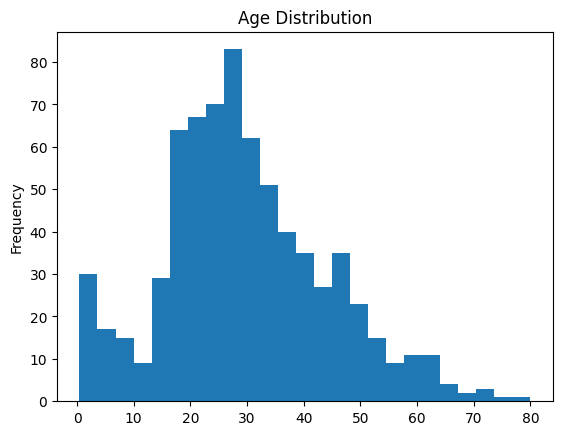

In [ ]:
# Create a histogram of ages
# bins=25 means "divide ages into 25 groups"
titanic['Age'].plot(kind='hist', bins=25, title='Age Distribution on Titanic',
                    xlabel='Age', ylabel='Number of Passengers', color='skyblue', edgecolor='black')

# What we can see:
# - Most passengers were 20-40 years old
# - There's a peak around 20-30 (young adults)
# - Few children under 10
# - Some elderly passengers (60+)

### 2. Scatter Plot - Finding Relationships

**What is it?** Shows the relationship between two numerical variables.

**Question:** "Do older people pay more for tickets?"

**How it works:**
- Each dot = one person
- X-axis = Age
- Y-axis = Fare (ticket price)

**What to look for:**
- Is there a pattern? (upward, downward, or random)
- Are there outliers? (dots far from the rest)
- Any clusters?

<Axes: title={'center': 'Age vs Ticket Price'}, xlabel='Age', ylabel='Fare'>

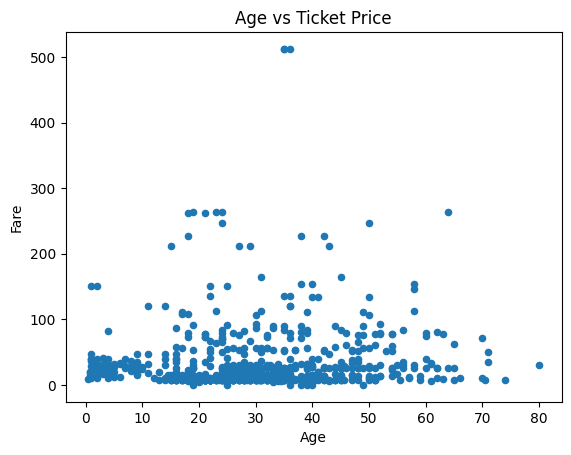

In [ ]:
# Scatter plot: Age vs Fare
titanic.plot(kind='scatter', x='Age', y='Fare', title='Age vs Ticket Price',
             alpha=0.5, color='coral')

# What we can see:
# - Most dots are clustered at the bottom (low fares)
# - Some outliers at the top (people who paid $500+!)
# - Age doesn't strongly predict fare (dots are scattered)
# - Expensive tickets were bought by people of all ages

### 3. Bar Chart - Comparing Categories

**What is it?** Compares values across different categories.

**Question:** "How did survival rates differ by passenger class?"

**How it works:**
- Each bar = one category (class 1, 2, or 3)
- Bar height = value (survival rate)

**Perfect for:** Visualizing our GroupBy results!

In [ ]:
# Get survival by class (we calculated this earlier)
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print("Survival rates:")
print(survival_by_class)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: title={'center': 'Survival Rate by Class'}, xlabel='Survival Rate', ylabel='Pclass'>

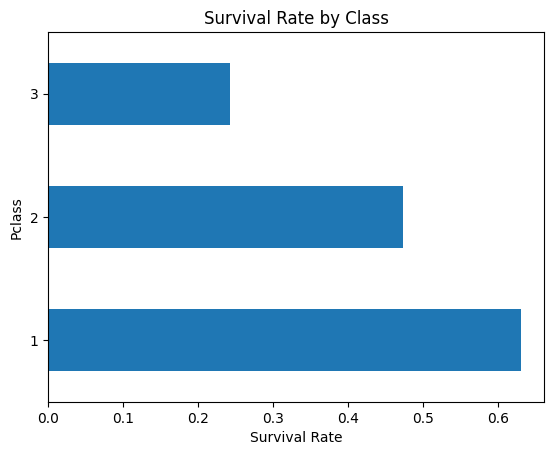

In [ ]:
# Create a horizontal bar chart
survival_by_class.plot(kind='barh', title='Survival Rate by Passenger Class', 
                       xlabel='Survival Rate', ylabel='Class',
                       color=['gold', 'silver', 'bronze'])

# What we can see:
# - Clear visual difference between classes
# - 1st class (gold) has longest bar = highest survival
# - 3rd class (bronze) has shortest bar = lowest survival
# - The difference is dramatic!

### 4. Pie Chart - Parts of a Whole

**What is it?** Shows how a total is divided into parts (percentages).

**Question:** "What percentage of passengers were male vs female?"

**How it works:**
- Circle = 100% of data
- Each slice = percentage of one category

**Best for:** Showing proportions (but don't use if you have many categories!)

<Axes: ylabel='count'>

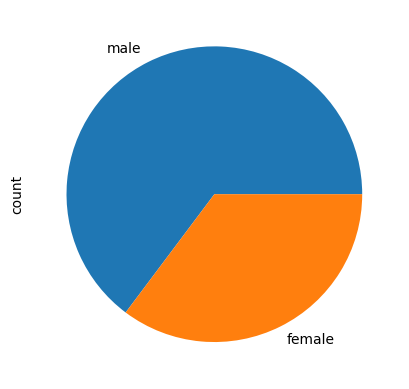

In [ ]:
# Pie chart of gender distribution
titanic['Sex'].value_counts().plot(kind='pie', title='Gender Distribution',
                                   autopct='%1.1f%%', colors=['lightblue', 'pink'])

# What we can see:
# - Approximately 2/3 male, 1/3 female
# - The ship had more male passengers

<Axes: ylabel='count'>

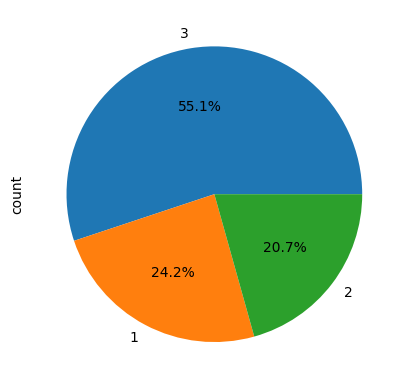

In [ ]:
# Pie chart of passenger class distribution
titanic['Pclass'].value_counts().sort_index().plot(kind='pie', 
                                                    title='Passengers by Class',
                                                    autopct='%1.1f%%',
                                                    labels=['1st Class', '2nd Class', '3rd Class'],
                                                    colors=['gold', 'silver', 'bronze'])

# What we can see:
# - Over half the passengers were in 3rd class (cheapest)
# - 1st class was the smallest group (most expensive)

## Summary - What You've Learned! 🎉

Congratulations! You now know the fundamentals of data analysis with Pandas:

### Core Concepts:
✅ **Series** - Single columns with labels  
✅ **DataFrame** - Full tables of data  
✅ **Essential methods** - `.head()`, `.info()`, `.describe()`  

### Data Manipulation:
✅ **Loading data** - `pd.read_csv()`  
✅ **Filtering** - Boolean masks to find specific rows  
✅ **Selection** - Getting specific columns and rows  

### Data Cleaning:
✅ **Missing data** - Finding, dropping, and filling  
✅ **Duplicates** - Detecting and removing  
✅ **Type conversion** - `.astype()` and `.rename()`  

### Feature Engineering:
✅ **Creating columns** - Combining existing data  
✅ **Applying logic** - Using `.apply()` and lambda functions  
✅ **Encoding** - Converting text to numbers with `.map()`  

### Analysis:
✅ **Aggregation** - `.value_counts()` for tallying  
✅ **GroupBy** - Split-Apply-Combine for group statistics  

### Visualization:
✅ **Histograms** - Distribution of values  
✅ **Scatter plots** - Relationships between variables  
✅ **Bar charts** - Comparing categories  
✅ **Pie charts** - Parts of a whole  

---

### Next Steps:
- Practice with your own datasets!
- Explore more advanced visualizations (seaborn, matplotlib)
- Learn machine learning to make predictions from your data

**Remember:** Data analysis is like detective work - ask questions, investigate, and look for patterns!

By Hassan Algamdi : [linkedin](https://www.linkedin.com/in/hassan-algamdi-93890b290/)